In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from collections import defaultdict

In [1]:
import sys
import os
from glob import glob

In [2]:
sys.path.append('../../')

In [3]:
from bertrand.training.evaluate import get_epochs_to_step, PeptideTCRDataset, metrics_per_epoch, aggregate_metrics_per_epoch

In [4]:
def get_test_metric_per_epoch(model_dir, dataset):
    cv_seed = int(os.path.split(model_dir)[-1].replace("cv_seed=", ""))
    epochs_to_step = get_epochs_to_step(model_dir)

    val_test_dataset = PeptideTCRDataset(dataset, cv_seed, "val+test")
    # cancer_dataset = PeptideTCRDataset(dataset, cv_seed, "cancer")

    pred_fn = os.path.join(model_dir, "predictions.pkl")
    pred_list = pd.read_pickle(pred_fn)

    # rocs_val = metrics_per_epoch(pred_list, val_test_dataset, subset="val")
    # weighted_average_val, average_val, std_val = aggregate_metrics_per_epoch(rocs_val)

    rocs_test = metrics_per_epoch(pred_list, val_test_dataset, subset="test")
    weighted_average_test, average_test, std_test = aggregate_metrics_per_epoch(
        rocs_test
    )
    return weighted_average_test

In [6]:
bertrand_results_per_epoch = defaultdict(list)

In [30]:
results_dirs = {
    'baseline': '/mnt/storage2/olek/bertrand-rep3/training-nomlm/',
    'pretrained': '/mnt/storage2/olek/bertrand-rep3/training-dean/'
}

In [31]:
datasets_dir = '../../results/negative_decoys/datasets/'


In [32]:
!ls /mnt/storage2/olek

bertrand-gdrive       bertrand-paper  bertrand-rep2  encodings
bertrand-outputs.zip  bertrand-rep1   bertrand-rep3


In [11]:
for dataset_fn in sorted(glob(os.path.join(datasets_dir, "*.csv.gz"))):
    dataset_name = os.path.basename(dataset_fn).replace(".csv.gz", "")
    dataset = pd.read_csv(dataset_fn, low_memory=False)
    print(dataset_name)
    for model_name, results_dir in results_dirs.items():
        dataset_results_dir = os.path.join(results_dir, dataset_name)
        print(model_name)
        for model_dir in sorted(glob(os.path.join(dataset_results_dir, "cv_seed=*"))):
            print(model_dir)
            weighted_average_test = get_test_metric_per_epoch(model_dir, dataset)
            bertrand_results_per_epoch[model_name].append(weighted_average_test)
#             raise Exception()

dataset_42
baseline
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=42
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=43
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=44
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=45
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=46
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=47
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=48
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=49
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=50
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=51
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=52
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=53
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=54
/mnt/storage2/olek/bertrand-rep3/training-nomlm/dataset_42/cv_seed=55


In [14]:
# bertrand_peptide_results_list = []
# bertrand_results_per_epoch = defaultdict(list)
# for e in bertrand_results:
#     cancer_rocs = e['cancer_res_flat'].copy()
#     cancer_rocs.loc[:, 'set'] = 'cancer'
#     cancer_rocs.loc[:, 'model'] = e['model']
    
#     test_rocs = e['pep_res_flat'].copy()
#     test_rocs.loc[:, 'set'] = 'test'
#     test_rocs.loc[:, 'model'] = e['model']
    
#     bertrand_results_per_epoch[e['model']].append(e['weighted_average'])
    
#     bertrand_peptide_results_list.append(cancer_rocs)
#     bertrand_peptide_results_list.append(test_rocs)
    

In [34]:
bertrand_results_df = pd.concat([
    pd.read_csv('/mnt/storage2/olek/bertrand-rep3/training-nomlm/results.csv').assign(model='baseline', mask=True),
    pd.read_csv('/mnt/storage2/olek/bertrand-rep3/training-dean/results.csv').assign(model='pre-trained', mask=True),
])

In [35]:
bertrand_results_df.shape

(36648, 8)

In [36]:
bertrand_results_df.head()

,rocs,n,peptide,cv_seed,dataset,subset,model,mask
0,0.491092,48,CTELKLSDY,42,dataset_42,test,baseline,True
1,0.628261,30,FLRGRAYGL,42,dataset_42,test,baseline,True
2,0.507990,266,FRCPRRFCF,42,dataset_42,test,baseline,True
3,0.576105,28,GLNKIVRMY,42,dataset_42,test,baseline,True
4,0.513774,66,GPGHKARVL,42,dataset_42,test,baseline,True


In [37]:
bertrand_results_df.head(2)

,rocs,n,peptide,cv_seed,dataset,subset,model,mask
0,0.491092,48,CTELKLSDY,42,dataset_42,test,baseline,True
1,0.628261,30,FLRGRAYGL,42,dataset_42,test,baseline,True


In [38]:
results_df = bertrand_results_df#.query("dataset == 'dataset_42'").reset_index(drop=True).copy()

In [39]:
results_df.loc[:, 'set'] = results_df['subset'].map({'test': 'Cross validation test set', 'cancer': 'Independent cancer set'})
results_df.loc[:, 'mask'] = results_df['mask'].map({False: 'Basic filtering', True: 'Easy negatives filtering'})

In [40]:
results_df.head(2)

,rocs,n,peptide,cv_seed,dataset,subset,model,mask,set
0,0.491092,48,CTELKLSDY,42,dataset_42,test,baseline,Easy negatives filtering,Cross validation test set
1,0.628261,30,FLRGRAYGL,42,dataset_42,test,baseline,Easy negatives filtering,Cross validation test set


In [41]:
results_df[results_df.n >= 5].groupby(['model', 'subset', 'mask']).rocs.agg('mean').unstack()

mask                Easy negatives filtering
model       subset                          
baseline    cancer                  0.611081
            test                    0.584619
pre-trained cancer                  0.685310
            test                    0.645296

In [42]:
results_df_agg = results_df[results_df.n >= 5].groupby(['model', 
                                                        'subset',
                                                        'mask',
                                                        'dataset', 
                                                        'cv_seed']).rocs.agg(['mean', 'std']).reset_index()

In [43]:
results_df_agg.rename(columns={'mean': 'roc', 'std': 'roc_std'}, inplace=True)

In [44]:
# results_df_agg2 = results_df_agg.groupby(['model', 'subset', 'mask']).agg('mean').reset_index()

In [45]:
def plot_per_epoch(ax):
    res_baseline = np.vstack(bertrand_results_per_epoch['baseline'])
    average_average_auroc_baseline = res_baseline.mean(0)
    std_average_auroc_baseline = res_baseline.std(0)
    res_pretrained = np.vstack(bertrand_results_per_epoch['pretrained'])
    average_average_auroc_pretrained = res_pretrained.mean(0)
    std_average_auroc_pretrained = res_pretrained.std(0)

    ax.plot(average_average_auroc_baseline)
    ax.plot(np.arange(len(average_average_auroc_baseline)), 
                average_average_auroc_baseline, 
            color='#AB63FA')
    ax.fill_between(np.arange(len(average_average_auroc_baseline)), 
                   average_average_auroc_baseline-std_average_auroc_baseline,
                   average_average_auroc_baseline+std_average_auroc_baseline,
                   alpha=0.3, color='#AB63FA')

    ax.plot(np.arange(len(average_average_auroc_pretrained)), 
                average_average_auroc_pretrained, color='#65B020')
    ax.fill_between(np.arange(len(average_average_auroc_pretrained)), 
                   average_average_auroc_pretrained-std_average_auroc_pretrained,
                   average_average_auroc_pretrained+std_average_auroc_pretrained,
                   alpha=0.3, color='#65B020')
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('weighted AUROC', fontsize=12)

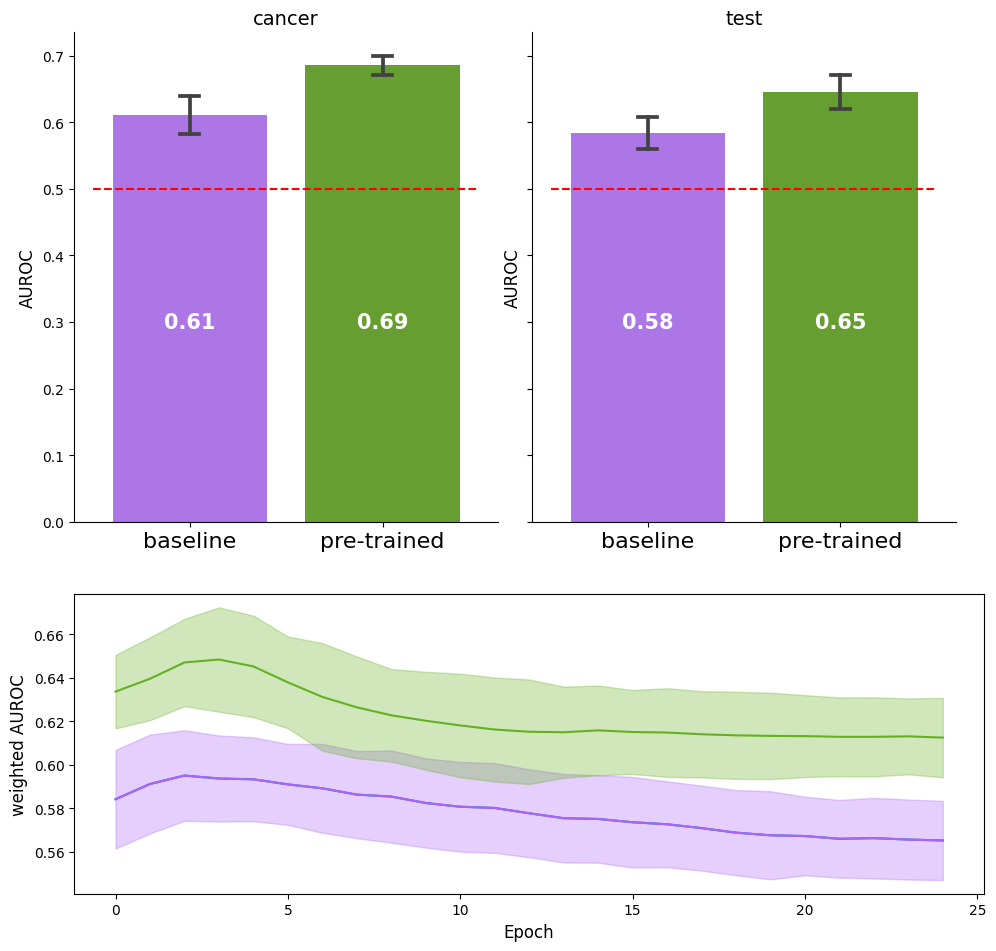

In [49]:
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    kwargs.pop('color')
    # data.plot(x=x,
    #           y=y,
    #           yerr=yerr,
    #           kind="bar", 
    #           ax=ax,
    #           capsize=5, color=['#EF553BCF', '#1F77B4CF', '#53A40DDF'], **kwargs)
    sns.barplot(data=data, x=x, y=y, ax=ax, capsize=0.1, ci='sd', **kwargs,
                order=['baseline', 'pre-trained'], 
                palette=['#AB63FA', '#65B020'])
    # ax.set_ylim(0.5, 1.0)
    auroc_mean = data.groupby('model')[y].agg('mean')
    auroc_mean = auroc_mean.loc[['baseline', 'pre-trained']]
    for i, roc in enumerate(auroc_mean):
        # if roc - rocerr <= 0.5:
        text  = '%.2f' % roc
        # else:
        #     text = '%.2f${}^\mathbf{*}$' % roc
        ax.text(i, 0.3,  text, color='white', fontweight='bold', fontsize=15, ha='center', va='center')
    ax.hlines(0.5, -0.5, 1.5, color='red', linestyle='--')
    # if data['mask'].iloc[0] == 'Easy negatives filtering':
    #     ax.text(2.5, 1, data.dataset.iloc[0],  ha='center', va='center', size=14)
        

g = sns.FacetGrid(results_df_agg, col="subset")
g.map_dataframe(errplot, "model", "roc", "roc_std")

g.set_titles(template="{col_name}", size=14) # {row_name}\n{col_name}
[plt.setp(ax.get_xticklabels(), rotation=0, fontsize=16) for ax in g.axes.flat]
[ax.set_xlabel('') for ax in g.axes.flat]
g.axes[0, 0].set_ylabel('AUROC', fontsize=12)
g.axes[0, 1].set_ylabel('AUROC', fontsize=12)



# for ax, letter in zip(g.axes.flat, ["A","B"]):
#     ax.text(-0.4, 0.75 ,letter, fontweight="bold", fontsize=20)


g.fig.subplots_adjust(bottom=0.07, left=0.07, right=0.7)

ax = g.fig.add_axes([0.07, -0.55, 0.65, 0.5], label='axis1')
plot_per_epoch(ax)
# ax.text(-0.1, 0.666, "C",fontweight="bold", fontsize=20)


g.fig.set_size_inches(14, 6)
# from matplotlib.transforms import Bbox
# g.figure.savefig('comparison.png', bbox_inches="tight")

plt.savefig('nlpbaseline2.svg',  bbox_inches="tight")
plt.savefig("nlpbaseline.png", dpi=600, bbox_inchess="tight")
plt.show()